# Simple Folder Structures

We saw how we can open individual images by providing an absolute path to each of them. Soon enough, when you have established a workflow, you will want to do batch processing and, by then, manually providing paths to images becomes impractical to say the least. Besides that, having your images organized in a standardized folder strucutre is necessary for machine/deep learning workflows and for sharing your data with the scientific community.

In this notebook, we show the simplest structure to introduce you how to read multiple images from a folder.

In [1]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

## Car Trunk "Folder Structure"

If you throw your images and data in a single big folder, then your image repository looks like a car trunk. Even though it may be practical at first, you will most likely have to re-arange that. Let's see an example. The folder "Project1_Car_Trunk" looks like this:

```
Project1_Car_Trunk
|
├─ .DS_store
├─ 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png
├─ 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png
├─ 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe.png
├─ 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e.png
├─ 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6.png
└─ Readme.txt
```

The only good practice in this example is that there is at least a 'Readme' file. Every time you create a new folder, consider right away adding a 'Readme.txt' or 'Readme.md' file there to provide a brief description of what is in this folder.

## Working with file and folder paths in Python

To open files inside a folder, we create a path to the folder using the class [Path](https://docs.python.org/3/library/pathlib.html#concrete-paths) from the [pathlib](https://docs.python.org/3/library/pathlib.html) library. Other popular library for that is [os](https://docs.python.org/3/library/os.html), but here we use pathlib.

We feed the data repository relative path to the Path class.

In [2]:
data_folder1 = '../../data/Folder_Structures/Project1_Car_Trunk'
data_path = Path(data_folder1)
data_path

PosixPath('../../data/Folder_Structures/Project1_Car_Trunk')

In [3]:
# the name of the file or folder
data_path.name

'Project1_Car_Trunk'

In [4]:
# the name of the parent file or folder
data_path.parent

PosixPath('../../data/Folder_Structures')

In [5]:
# join paths together
text_file = data_path / 'subdirectory/file.txt'
text_file

PosixPath('../../data/Folder_Structures/Project1_Car_Trunk/subdirectory/file.txt')

In [6]:
# check if a file or folder exists
print(f'Does the text file exist? {text_file.exists()}')
print(f'Does the data path exist? {data_path.exists()}')

Does the text file exist? False
Does the data path exist? True


## Looping over files inside a folder
Now we will iterate over this directory using a `for` loop and print each new path we find inside. We do that by iterating with the method `.iterdir`.

In [7]:
for path in data_path.iterdir():
    print(path.name)

0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe.png
0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6.png
0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e.png
0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png
.DS_store.txt
Readme.txt
00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png


Use the `glob` method if you need to restrict to a certain file extension (or other part of a file name).

In [8]:
for path in data_path.glob('*.png'):
    print(path.name)

0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe.png
0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6.png
0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e.png
0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png
00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png


And that is generally how you can access images in folder: by iterating over items with `for` loops and the `iteritem` method. If you need to filter files, use the `glob` method. 

Using file lists multiple times.

`iterdir` and `glob` return generator objects. These can only be used once. Convert them to a list in order to use them multiple times.

In [9]:
image_path_list = list(data_path.glob('*.png'))

Finally, to demonstrate that we can access these images, let's open and display them. The python `enumerate` function yields pairs containing a count and the item in the list.

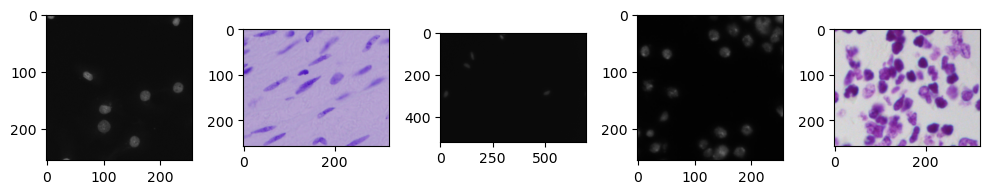

In [10]:
# first we use the list to determine the number of files with len(image_path_list), so that we can create a figure with the appropriate number of subplots
fig, ax = plt.subplots(1, len(image_path_list), figsize=(10,3))

# Now we loop over the list to plot each image
for count, image_path in enumerate(image_path_list):
    image = imread(image_path)
    ax[count].imshow(image)
    
plt.tight_layout()